In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [140]:
z = np.arange(-10,10,0.01)

In [141]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

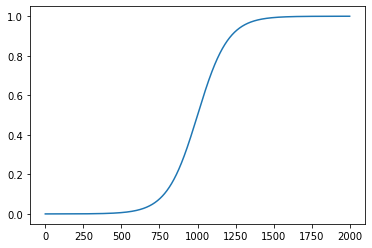

In [142]:
plt.plot(range(len(z)),sigmoid(z))

In [143]:
from sklearn.datasets import load_iris

In [144]:
data = load_iris()

In [145]:
x = data.data
y = data.target 

data = pd.concat([pd.DataFrame(x),pd.Series(y)],axis=1)

In [146]:
data.columns = ['1','2','3','4','5']

In [147]:
data = data[data['5'] != 2]

In [148]:
data

,1,2,3,4,5
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [149]:
x = data.drop('5',axis=1)
y = data[['5']]
y.shape

(100, 1)

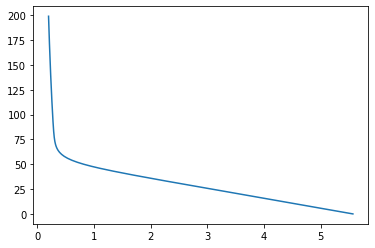

In [150]:

lr = 0.01
costs = []
intercept = np.ones((x.shape[0],1))

x = np.hstack((intercept,x.values))
weights = np.ones((x.shape[1],1))

def cost(y,y_hat):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

for i in range(200):
    z = np.dot(x,weights)
    y_hat = sigmoid(z)
    gradient = np.dot(x.T,(y_hat - y)) / y.size
    weights = weights - (lr * gradient)
    costs.append(cost(y,y_hat))
    

plt.plot(costs,range(len(costs)))